In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df =pd.read_excel('insurance.xlsx')

# Data Analysis

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
df.shape

(1338, 7)

# One Hot Encoding

In [9]:
df = pd.get_dummies(df,drop_first='True')

In [10]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [11]:
df =df.astype(int)

In [12]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,0,1,0,0,1
1,18,33,1,1725,1,0,0,1,0
2,28,33,3,4449,1,0,0,1,0
3,33,22,0,21984,1,0,1,0,0
4,32,28,0,3866,1,0,1,0,0


In [13]:
df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.169656,1.094918,13269.928999,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.119875,1.205493,12110.012755,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.000000,0.000000,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.000000,0.000000,4740.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.000000,1.000000,9381.500000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.000000,2.000000,16639.250000,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.000000,5.000000,63770.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0,27.0,39.0,51.00,64.0
bmi,1338.0,30.169656,6.119875,15.0,26.0,30.0,34.00,53.0
children,1338.0,1.094918,1.205493,0.0,0.0,1.0,2.00,5.0
charges,1338.0,13269.928999,12110.012755,1121.0,4740.0,9381.5,16639.25,63770.0
sex_male,1338.0,0.505232,0.500160,0.0,0.0,1.0,1.00,1.0
smoker_yes,1338.0,0.204783,0.403694,0.0,0.0,0.0,0.00,1.0
region_northwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0
region_southeast,1338.0,0.272048,0.445181,0.0,0.0,0.0,1.00,1.0
region_southwest,1338.0,0.242900,0.428995,0.0,0.0,0.0,0.00,1.0


# Data Visualization

<Figure size 2000x2000 with 0 Axes>

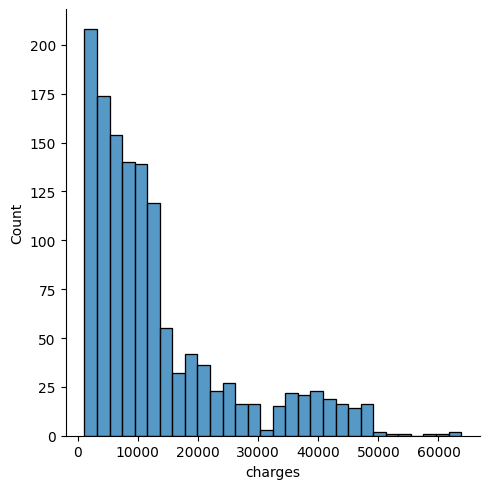

In [15]:
plt.figure(figsize=(20,20))
sns.displot(df['charges'])

<Axes: >

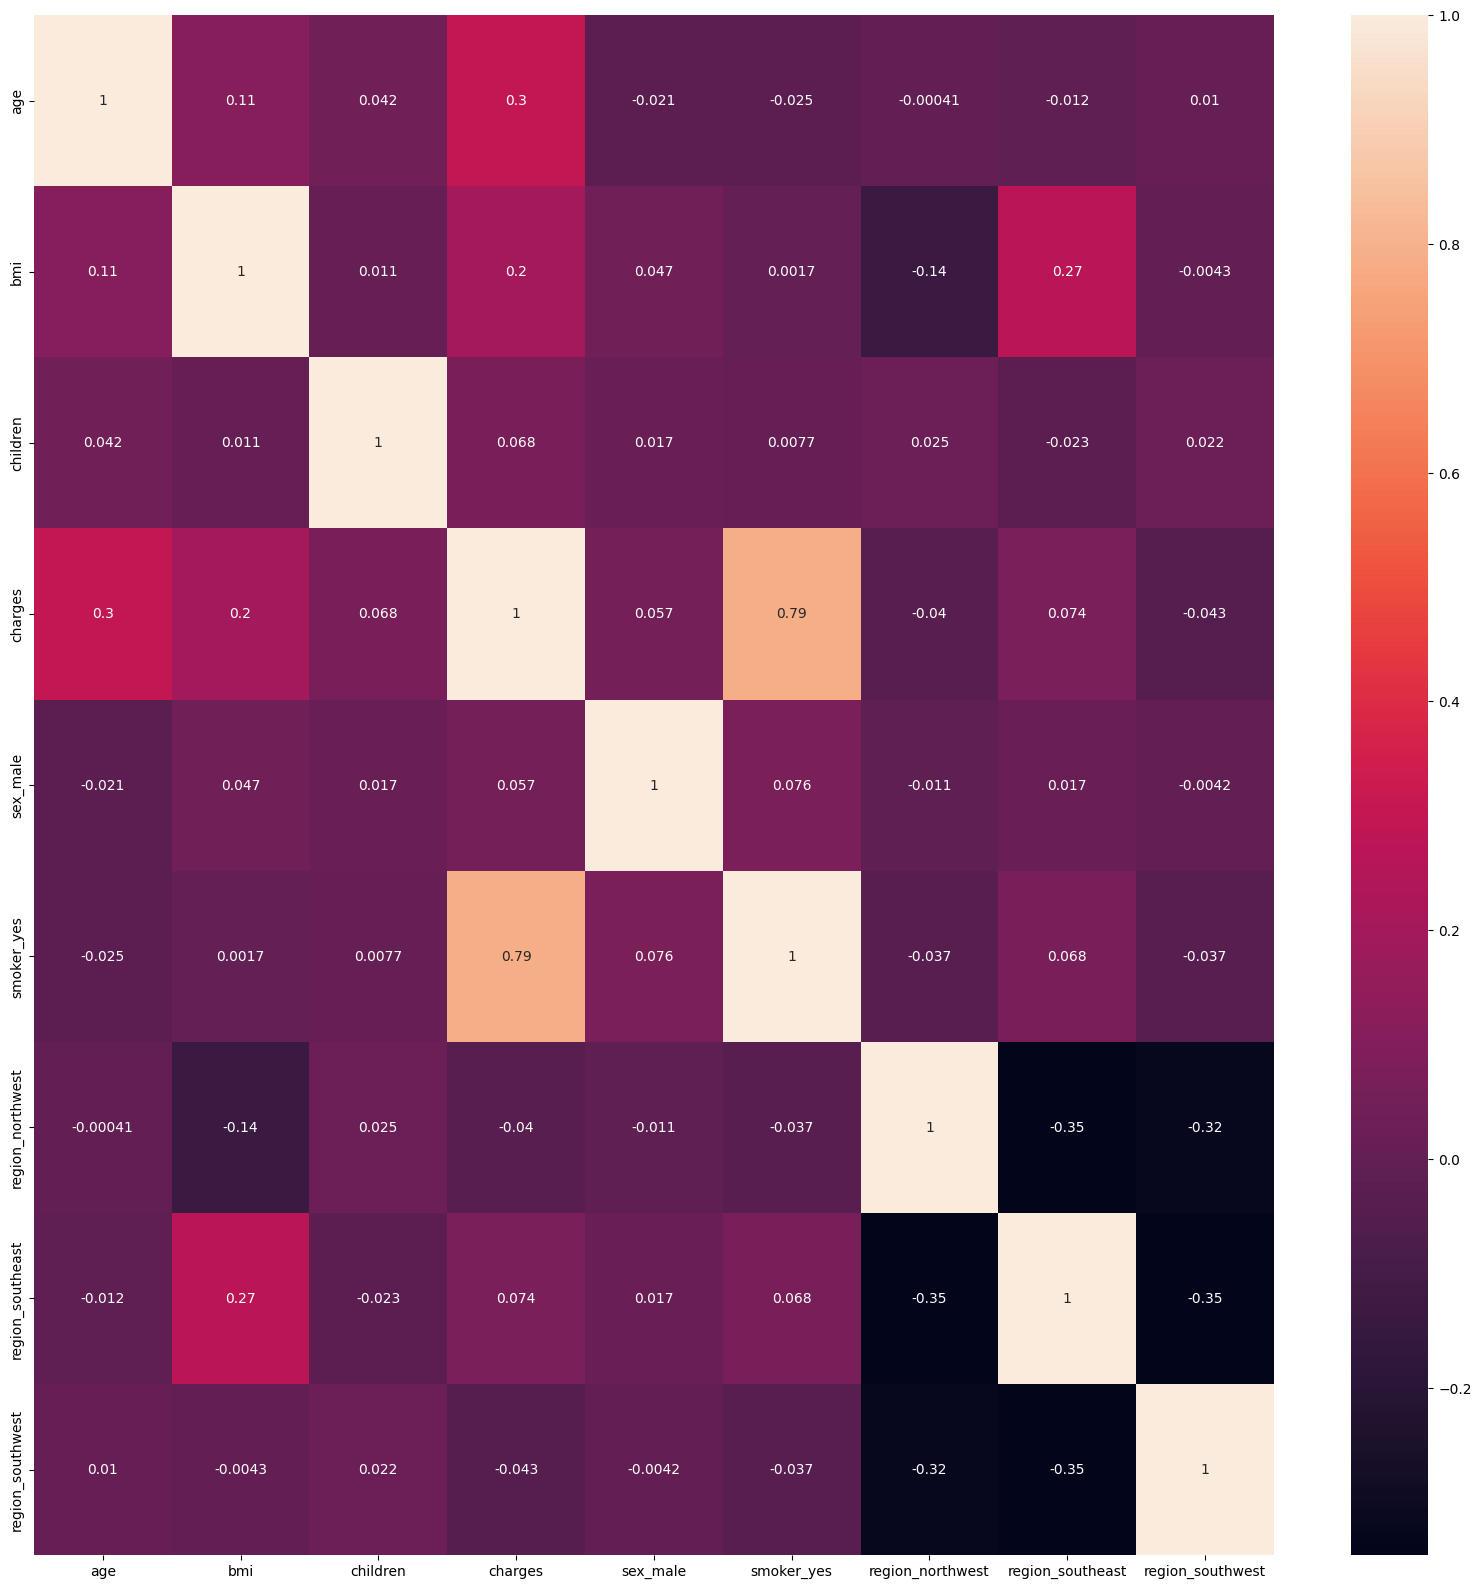

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Separate X Y

In [17]:
x = df.drop('charges',axis=1)
y=df['charges']

# Train Model

In [18]:
from sklearn.model_selection import train_test_split as tts

In [19]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3 , random_state =54)

In [20]:
xtrain.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
530,57,42,1,1,1,0,1,0
1137,26,22,0,0,0,1,0,0
194,18,34,0,1,0,0,1,0
702,53,41,0,1,0,0,1,0
245,54,30,0,1,0,1,0,0


In [21]:
ytrain.head()

530     48675
1137     3176
194      1137
702      9504
245     24476
Name: charges, dtype: int32

In [22]:
xtest.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
246,60,38,0,0,0,0,1,0
793,53,20,0,1,1,0,1,0
1175,22,27,0,0,0,0,0,1
467,56,33,2,0,0,1,0,0
356,46,43,3,1,0,0,1,0


In [23]:
ytest.head()

246     12648
793     21195
1175     2154
467     12643
356      8944
Name: charges, dtype: int32

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg =LinearRegression()

In [26]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [27]:
pred = reg.predict(xtest)

In [28]:
pred

array([ 1.60304065e+04,  3.26732053e+04,  1.98996451e+03,  1.38872681e+04,
        1.53274251e+04,  5.10509038e+03,  1.16836959e+04,  8.70795712e+03,
        5.95730255e+03,  2.48808842e+03,  7.31742035e+02,  5.27742433e+03,
        3.26053547e+04,  1.13871312e+04,  1.19410275e+04,  2.83606080e+04,
        6.01430509e+03,  1.13696067e+04,  1.41214899e+04,  5.24403739e+03,
        9.96234860e+03,  3.39839769e+04,  1.11313089e+04,  8.07272654e+03,
        1.68156646e+04,  9.43795015e+03,  1.03385396e+04,  1.31852845e+04,
        2.52379352e+03,  2.80615428e+03,  1.14806442e+04,  3.44375321e+04,
        1.75121026e+04,  7.86581274e+03,  1.29701789e+04,  2.81101677e+03,
        1.18644269e+04,  7.23833178e+03,  2.84684308e+04,  6.37037934e+03,
        1.70570804e+04,  4.92210948e+03,  8.01041941e+03,  1.30084182e+04,
        2.55259663e+04,  9.42076997e+03,  9.95395156e+03,  3.72522942e+03,
        1.39752023e+04,  5.69237718e+03,  2.93575618e+04,  3.33322823e+04,
        3.05339187e+04,  

# DataFrame Create

In [29]:
df_pred = pd.DataFrame({'Actual':ytest,'Prediction':pred,'Difference':abs(ytest-pred)})

In [30]:
df_pred.head()

,Actual,Prediction,Difference
246,12648,16030.406511,3382.406511
793,21195,32673.205295,11478.205295
1175,2154,1989.964513,164.035487
467,12643,13887.268071,1244.268071
356,8944,15327.425100,6383.425100


# Coefficient,Intercept,Accuracy

In [31]:
m=reg.coef_

In [32]:
m

array([  264.48326262,   321.92791176,   444.5668309 ,    56.4442144 ,
       24232.43981978,  -943.91937073,  -579.21987819, -1028.09086658])

In [33]:
c= reg.intercept_

In [34]:
c

-11492.630015280653

In [35]:
reg.score(xtest,ytest)

0.6577546031595782

# Step 2: USing Label Encoding

In [36]:
df =pd.read_excel('insurance.xlsx')

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
df1 =df.copy()

In [41]:
df1.sex = le.fit_transform(df1.sex)
df1.smoker =le.fit_transform(df1.smoker)
df1.region = le.fit_transform(df1.region)

In [42]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Train the Model

In [43]:
x = df1.drop('charges',axis=1)
y=df1['charges']

In [44]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size = 0.3 , random_state =74)

In [45]:
xtrain.head()

,age,sex,bmi,children,smoker,region
448,40,0,29.60,0,0,3
184,44,1,30.69,2,0,2
869,25,0,24.30,3,0,3
1143,39,1,32.34,2,0,2
691,47,1,36.20,1,0,3


In [46]:
ytrain.head()

448     5910.9440
184     7731.4271
869     4391.6520
1143    6338.0756
691     8068.1850
Name: charges, dtype: float64

In [47]:
xtest.head()

,age,sex,bmi,children,smoker,region
676,55,0,40.810,3,0,2
217,27,1,23.100,0,0,2
864,51,1,25.400,0,0,3
751,21,1,28.975,0,0,1
1106,49,0,29.925,0,0,1


In [48]:
reg1 =LinearRegression()

In [49]:
reg1.fit(xtrain,ytrain)

LinearRegression()

In [50]:
pred = reg1.predict(xtest)

In [51]:
pred

array([ 1.67314568e+04,  2.01465097e+03,  8.79150344e+03,  2.76683078e+03,
        1.03261027e+04,  3.19435881e+03,  2.81593135e+04,  1.20812989e+04,
        6.11510443e+03,  3.44921319e+04,  4.95932200e+03,  1.08706496e+04,
       -2.43403185e+01,  8.60461122e+03,  1.06859028e+04,  1.04537760e+04,
        1.39593424e+04,  3.90741786e+04,  4.87538805e+02,  6.73075996e+03,
        2.86066771e+04,  7.49933842e+03,  1.59878426e+04,  9.76754726e+03,
        9.32669468e+03,  2.43153884e+03,  4.40833717e+03,  1.63578638e+04,
        1.29269535e+04,  1.26141437e+04,  2.83656179e+04,  1.24487144e+04,
        3.57806481e+04,  1.00490455e+04,  2.98324881e+04,  3.63920777e+04,
        3.90735985e+04,  8.95214034e+03,  1.13946218e+04,  2.42501389e+03,
        4.52334389e+03,  8.47588096e+03, -1.49729363e+03,  7.09181391e+03,
        9.18824755e+03,  8.57219456e+03,  3.15727418e+03,  1.51531027e+04,
        1.16378206e+04,  1.25724468e+04,  1.84693237e+04,  2.75438413e+04,
        5.08126035e+03,  

In [52]:
df_pred = pd.DataFrame({'Actual':ytest,'Prediction':pred,'Difference':abs(ytest-pred)})

In [53]:
df_pred.head()

,Actual,Prediction,Difference
676,12485.80090,16731.456753,4245.655853
217,2483.73600,2014.650970,469.085030
864,8782.46900,8791.503443,9.034443
751,1906.35825,2766.830782,860.472532
1106,8988.15875,10326.102738,1337.943988


In [54]:
acc1=reg1.score(xtest,ytest)

In [55]:
acc1

0.7556041736458821

In [56]:
#One Hot Encoding : accuracy = 0.6577546031595782 or 66%
#Label Encoding : accuracy =    0.7556041736458821 or 76%

# Conclusion : Using Label Encoding The accuracy of the model increase

# Determine MAE and MSE

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [58]:
mae = mean_absolute_error(ytest,pred)

In [59]:
mae

4034.3415940508016

In [60]:
mse = mean_squared_error(ytest,pred)

In [61]:
mse

33990030.36193985

# Applying KNN Regressor

In [62]:
from sklearn.neighbors import KNeighborsRegressor

In [63]:
reg2 =KNeighborsRegressor(n_neighbors = 10)

In [64]:
reg2.fit(xtrain,ytrain)

KNeighborsRegressor(n_neighbors=10)

In [65]:
pred = reg2.predict(xtest)

In [66]:
pred

array([25256.773486 ,  4683.24992  , 16737.406048 ,  6949.5819   ,
       11887.45945  ,  5225.511935 , 10480.738163 , 15027.07252  ,
        6208.09462  , 13001.819738 ,  5774.006751 , 14062.018483 ,
        5034.234913 ,  9674.232475 , 12587.068045 , 22580.235681 ,
       14321.12289  , 25835.633703 ,  5334.917728 , 10471.435954 ,
        8499.65409  , 14151.936105 , 24567.269886 , 14178.691521 ,
       12403.014445 ,  7214.8198819,  2919.713428 , 19054.247876 ,
       20605.111554 , 17157.106701 , 12624.230178 , 12213.135566 ,
       19847.203005 , 11994.58354  , 11647.97204  , 11538.513819 ,
       28878.503778 , 13461.598901 , 16769.176471 ,  6791.1662   ,
        9941.76191  , 19354.542279 ,  3646.461863 , 12757.714145 ,
       18327.94466  , 21976.654085 , 12228.997614 , 20627.922405 ,
       16755.816892 , 11309.554834 , 18108.848465 , 11164.158941 ,
        8616.595259 , 15034.964912 ,  9658.981    , 14896.524105 ,
       16577.402257 , 23854.378249 , 17937.77596  ,  7841.5482

# Accuracy ,mae, mse

In [67]:
acc2 =r2_score(ytest,pred)

In [68]:
acc2

0.087221745917621

In [69]:
mae1 = mean_absolute_error(ytest,pred)

In [70]:
mae1

8521.915525341294

In [71]:
mse1= mean_squared_error(ytest,pred)

In [72]:
mse1

126947178.40649308

# DataFrame

In [77]:
data = {'Name':['Linear_mae','KNN_mae'],
       'Value':[mae,mae1]}

In [78]:
df_new =pd.DataFrame(data=data)

In [79]:
df_new.head()

,Name,Value
0,Linear_mae,4034.341594
1,KNN_mae,8521.915525


# Barplot MAE

<Axes: xlabel='Value', ylabel='Name'>

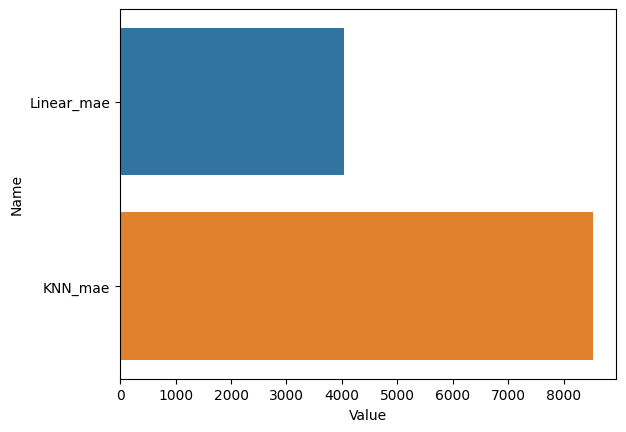

In [80]:
sns.barplot(x='Value',y='Name',data= df_new)

# Barplot MSE

In [81]:
data = {'Name':['Linear_mse','KNN_mse'],
       'Value':[mse,mse1]}

In [82]:
df_new =pd.DataFrame(data=data)

In [83]:
df_new.head()

,Name,Value
0,Linear_mse,3.399003e+07
1,KNN_mse,1.269472e+08


<Axes: xlabel='Value', ylabel='Name'>

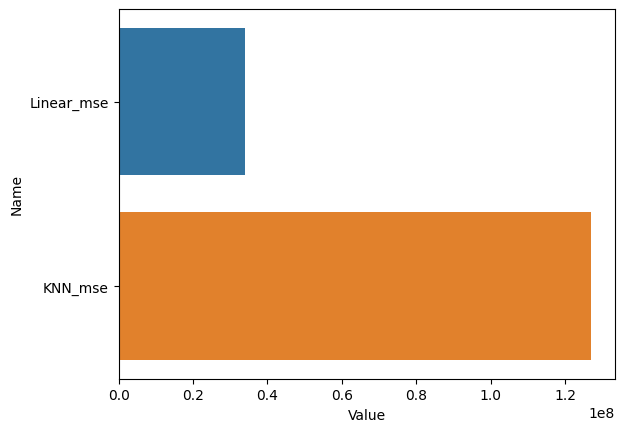

In [84]:
sns.barplot(x='Value',y='Name',data= df_new)

# Barplot Accuracy

In [85]:
data = {'Name':['Linear_Accuracy' , 'KNN_Accuracy'],
        'Value':[acc1,acc2]}

In [86]:
df_new =pd.DataFrame(data=data)

In [87]:
df_new.head()

,Name,Value
0,Linear_Accuracy,0.755604
1,KNN_Accuracy,0.087222


<Axes: xlabel='Value', ylabel='Name'>

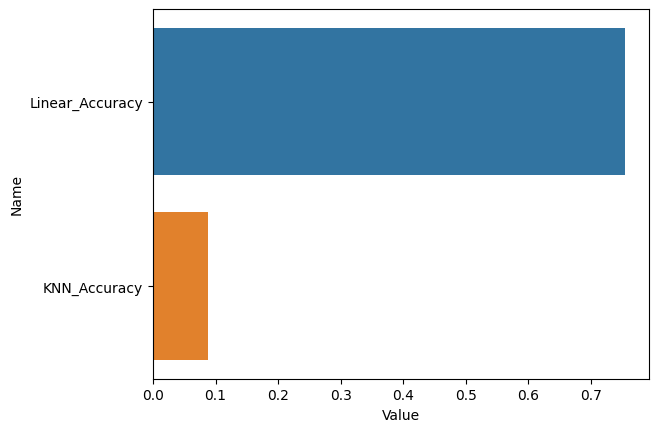

In [88]:
sns.barplot(x='Value',y='Name',data= df_new)